In [737]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect
import re

In [738]:
raw_data_source_path = '../data/job_data_1905.csv'
clean_data_detination_path = "../data/clean job_data_1905 have new salary handler.csv"

In [739]:
jobs = pd.read_csv(raw_data_source_path)

In [740]:
jobs.head()

,Unnamed: 0,Title,Link,Company,Size company,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills
0,0,Senior Php Developer,https://www.topcv.vn/viec-lam/senior-php-devel...,CÔNG TY TNHH GBG GROUP SERVICES,25-99 nhân viên,Tới 60 triệu,Hồ Chí Minh,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,"3+ Years of experience in PHP, MySQL.\nAble to..."
1,1,Nhân Viên Chăm Sóc Khách Hàng - Customer Servi...,https://www.topcv.vn/viec-lam/nhan-vien-cham-s...,CÔNG TY TNHH IDENTALSOFT VIỆT NAM,25-99 nhân viên,10 - 20 triệu,Hồ Chí Minh,Nhân viên,Dưới 1 năm,Toàn thời gian,Không yêu cầu,- Thành thạo English để nghe và nói chuyện với...
2,2,Quản Lý Dự Án IT - Long Sơn Petro,https://www.topcv.vn/viec-lam/quan-ly-du-an-it...,CÔNG TY TNHH GIẢI PHÁP DỮ LIỆU SÁNG TẠO,10-24 nhân viên,25 - 30 triệu,Bà Rịa-Vũng Tàu,Quản lý / Giám sát,3 năm,Toàn thời gian,Không yêu cầu,Tiếng Anh (bắt buộc)Sẵn sàng hỗ trợ đồng nghiệ...
3,3,Lập Trình Viên SQL,https://www.topcv.vn/viec-lam/lap-trinh-vien-s...,Công ty CP Giải pháp Thanh toán Việt Nam (VNPAY),1000+ nhân viên,Thoả thuận,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,- Trình độ chuyên môn: Tốt nghiệp Đại học hệ c...
4,4,Nhân Viên Tester (Ba/ QC/ Tester),https://www.topcv.vn/viec-lam/nhan-vien-tester...,Công ty Cổ phần Công nghệ Tin học và Dịch vụ G...,25-99 nhân viên,12 - 18 triệu,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,- Tốt nghiệp đại học chuyên ngành CNTT.\n- Ski...


In [741]:
jobs.count()

Unnamed: 0            2994
Title                 2994
Link                  2994
Company               2994
Size company          2994
Salary                2994
Locations             2994
Level                 2994
Year of Experience    2994
Contract Type         2994
Sex                   2994
Skills                2994
dtype: int64

# Làm sạch data

- Xóa 3 cột Title, Link, Company

In [742]:
jobs_cleaning = jobs.drop(columns=['Title', 'Link', 'Company', 'Size company'])
jobs_cleaning.head()

,Unnamed: 0,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills
0,0,Tới 60 triệu,Hồ Chí Minh,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,"3+ Years of experience in PHP, MySQL.\nAble to..."
1,1,10 - 20 triệu,Hồ Chí Minh,Nhân viên,Dưới 1 năm,Toàn thời gian,Không yêu cầu,- Thành thạo English để nghe và nói chuyện với...
2,2,25 - 30 triệu,Bà Rịa-Vũng Tàu,Quản lý / Giám sát,3 năm,Toàn thời gian,Không yêu cầu,Tiếng Anh (bắt buộc)Sẵn sàng hỗ trợ đồng nghiệ...
3,3,Thoả thuận,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,- Trình độ chuyên môn: Tốt nghiệp Đại học hệ c...
4,4,12 - 18 triệu,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,- Tốt nghiệp đại học chuyên ngành CNTT.\n- Ski...


- Xóa những hàng có Skills = null
Vì Skill giá trị null tức là bản ghi đó crawl bị lỗi

In [743]:
print("Trước khi xử lý")
print(jobs_cleaning.count())
jobs_cleaning = jobs_cleaning[jobs_cleaning['Level'].isnull() == False]
print("Sau khi xử lý")
print(jobs_cleaning.count())

Trước khi xử lý
Unnamed: 0            2994
Salary                2994
Locations             2994
Level                 2994
Year of Experience    2994
Contract Type         2994
Sex                   2994
Skills                2994
dtype: int64
Sau khi xử lý
Unnamed: 0            2994
Salary                2994
Locations             2994
Level                 2994
Year of Experience    2994
Contract Type         2994
Sex                   2994
Skills                2994
dtype: int64


- Làm sạch biến Salary

In [744]:
jobs_cleaning = jobs_cleaning[jobs_cleaning['Salary'] != 'Thoả thuận']
jobs_cleaning.head()

,Unnamed: 0,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills
0,0,Tới 60 triệu,Hồ Chí Minh,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,"3+ Years of experience in PHP, MySQL.\nAble to..."
1,1,10 - 20 triệu,Hồ Chí Minh,Nhân viên,Dưới 1 năm,Toàn thời gian,Không yêu cầu,- Thành thạo English để nghe và nói chuyện với...
2,2,25 - 30 triệu,Bà Rịa-Vũng Tàu,Quản lý / Giám sát,3 năm,Toàn thời gian,Không yêu cầu,Tiếng Anh (bắt buộc)Sẵn sàng hỗ trợ đồng nghiệ...
4,4,12 - 18 triệu,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,- Tốt nghiệp đại học chuyên ngành CNTT.\n- Ski...
5,5,"Tới 1,300 USD",Hồ Chí Minh,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,=> English is a very big bonus point- Strong p...


Hàm chuyển chuỗi(tiền) thành số

In [745]:
def str_to_num(str):
    if '.' in str:
        return float(str.replace(',', ''))
    else:
        return int(str.replace(',', ''))

Hàm chuyển tiền mệnh giá USD sang VND

In [746]:
def USD_to_VND(USD_value):
    return USD_value * 23000

Giá trị lương thường có những kiểu sau:

Tới xxx USD

xxx - xxx USD

Tới xxx triệu

xxx - xxx triệu

In [747]:
def analyze_salary(input):
    # Regex pattern
    regex_patternUSD = r'(?<!\d)(\d{1,3}(,\d{3})*|\d+)(\s*-\s*(\d{1,3}(,\d{3})*|\d+))?\s*(USD)?(?!\d)'
    regex_patternVND = r'(?<!\d)(\d{1,3}(.\d)*|\d+)(\s*-\s*(\d{1,3}(.\d)*|\d+))?\s*(triệu)?(?!\d)'

    # Tìm kiếm giá trị số trong chuỗi
    if 'USD' in input:
        matches = re.findall(regex_patternUSD, input)
    elif 'triệu' in input:
        matches = re.findall(regex_patternVND, input)

    # In kết quả tìm thấy
    if matches:
        value = 0
        for match in matches:
            value += str_to_num(match[0])
            if match[3]:
                value = value
            else:
                value = 0
            if (match[-1] == 'USD'):
                value = USD_to_VND(value)
            else:
                value *= 1000000
        return value
    else:
        return -1

In [748]:
jobs_cleaning['Salary'] = jobs_cleaning['Salary'].apply(analyze_salary)

Trước khi loại bỏ các giá trị ngoại lệ

<Figure size 200x600 with 0 Axes>

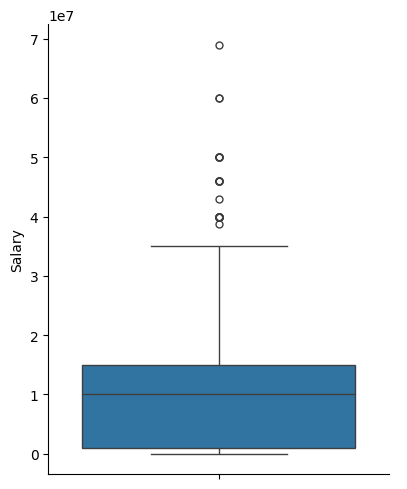

In [749]:
plt.figure(figsize=(2, 6))
sns.catplot(jobs_cleaning, y="Salary", aspect=0.8, kind="box")

In [750]:
# Top 10 mức lương cao nhất
top_10_salary = pd.DataFrame(jobs_cleaning['Salary']).nlargest(10, 'Salary')
top_10_salary

,Salary
590,69000000.0
680,60000000.0
1527,60000000.0
92,50000000.0
719,50000000.0
891,50000000.0
2464,50000000.0
2791,50000000.0
346,46000000.0
587,46000000.0


In [751]:
# Top 10 mức lương thấp nhất
top_10_salary = pd.DataFrame(jobs_cleaning['Salary']).nsmallest(10, 'Salary')
top_10_salary

,Salary
0,0.0
5,0.0
10,0.0
12,0.0
14,0.0
15,0.0
23,0.0
27,0.0
29,0.0
31,0.0


In [752]:
def valid_salary(salary):
    if salary == 0 or salary > 100000000:
        return False
    return True

In [753]:
jobs_cleaning = jobs_cleaning[jobs_cleaning['Salary'].apply(valid_salary)]

<Figure size 200x600 with 0 Axes>

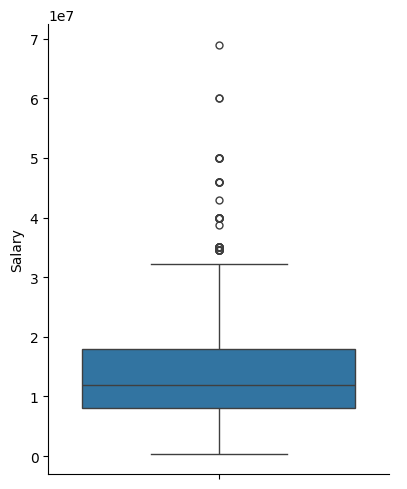

In [754]:
plt.figure(figsize=(2, 6))
sns.catplot(jobs_cleaning, y="Salary", aspect=0.8, kind="box")

Loại bỏ các giá trị Salary ngoại lệ

In [755]:
# Xử lý ngoại lệ biến Salary
Q1 = jobs_cleaning['Salary'].quantile(0.3)
Q3 = jobs_cleaning['Salary'].quantile(0.7)
IQR = Q3 - Q1

jobs_cleaning = jobs_cleaning[(jobs_cleaning['Salary'] >= (Q1 - 1.5 * IQR)) & (jobs_cleaning['Salary'] <= (Q3 + 1.5 * IQR))]
jobs_cleaning = jobs_cleaning[jobs_cleaning['Salary'] > 0]

Sau khi loại bỏ các giá trị Salary ngoại lệ

<Figure size 200x600 with 0 Axes>

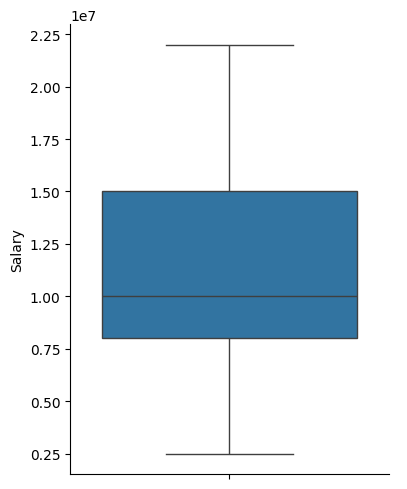

In [756]:
plt.figure(figsize=(2, 6))
sns.catplot(jobs_cleaning, y="Salary", aspect=0.8, kind="box")

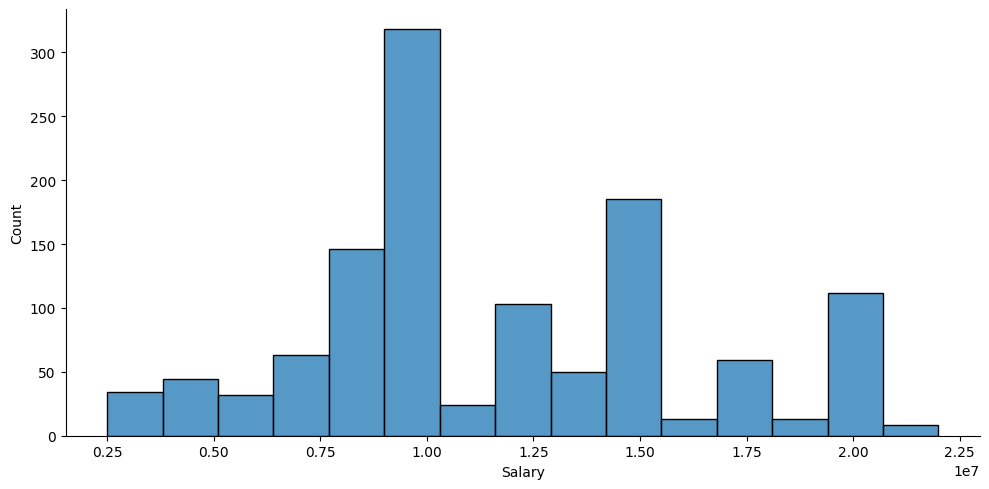

In [757]:
sns.displot(jobs_cleaning, x="Salary", height=5, aspect=2)

Mức 'Salary' sau khi được làm sạch, dữ liệu không còn là loại danh mục mà là miền giá trị liên tục

- Xác định ngôn ngữ lập trình 'Programming Languages' được yêu cầu cho 1 công việc

In [758]:
programing_languages = ['C#', 'Java', 'C++', 'C', 'Javascript', 'Python', 'PHP', 'Kotlin', 'Dart', 'TypeScript']

In [759]:
def analyze_programing_language(text):
    # Kiểm tra nếu giá trị là chuỗi
    if isinstance(text, str):
        # Tạo một biểu thức chính quy từ danh sách các ngôn ngữ lập trình
        regex_pattern = r'(?<!\w)(?:' + '|'.join(re.escape(lang.lower()) for lang in programing_languages) + r')(?!\w)'

        # Tìm kiếm các ngôn ngữ lập trình trong văn bản đầu vào và duy trì thứ tự xuất hiện
        matches = re.findall(regex_pattern, text.lower())

        # Trả về các ngôn ngữ lập trình tìm thấy
        unique_matches = list(set(matches))
        
        return unique_matches
    else:
        return []

In [760]:
jobs_cleaning['Programming Languages'] = jobs_cleaning['Skills'].apply(analyze_programing_language)
jobs_cleaning.head()

,Unnamed: 0,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills,Programming Languages
1,1,10000000.0,Hồ Chí Minh,Nhân viên,Dưới 1 năm,Toàn thời gian,Không yêu cầu,- Thành thạo English để nghe và nói chuyện với...,[]
4,4,12000000.0,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,- Tốt nghiệp đại học chuyên ngành CNTT.\n- Ski...,[]
8,8,10000000.0,Hà Nội,Nhân viên,Không yêu cầu kinh nghiệm,Toàn thời gian,Không yêu cầu,- Có ít nhất 01 năm kinh nghiệm làm việc tại v...,[]
13,13,8000000.0,Hồ Chí Minh,Nhân viên,1 năm,Toàn thời gian,Nữ,Có năng lực và mong muốn làm ở vị trí kinh doa...,[]
18,18,9000000.0,Hồ Chí Minh,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,"- Ưu tiên: Nam\n- Tốt nghiệp Cao Đẳng, Đại học...",[]


- Xác định ngoại ngữ 'Language' được yêu câu cho 1 công việc

In [761]:
languages = ['Tiếng Anh', 'Tiếng Nhật', 'Japanese', 'English']

In [762]:
def analyze_language(text):
    # Kiểm tra nếu giá trị là chuỗi
    if isinstance(text, str):
        # Tạo một biểu thức chính quy từ danh sách các ngôn ngữ
        regex_pattern = r'(?<!\w)(?:' + '|'.join(re.escape(lang.lower()) for lang in languages) + r')(?!\w)'

        # Tìm kiếm các ngôn ngữ trong văn bản đầu vào và duy trì thứ tự xuất hiện
        matches = re.findall(regex_pattern, text.lower())

        # Trả về các ngôn ngữ tìm thấy
        unique_matches = list(set(matches))

        if 'japanese' in unique_matches:
            unique_matches.remove('japanese')
            unique_matches.append('tiếng nhật')
        if 'english' in unique_matches:
            unique_matches.remove('english')
            unique_matches.append('tiếng anh')
        
        return unique_matches
    else:
        return []

In [763]:
jobs_cleaning['Languages'] = jobs_cleaning['Skills'].apply(analyze_language)
jobs_cleaning.head()

,Unnamed: 0,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills,Programming Languages,Languages
1,1,10000000.0,Hồ Chí Minh,Nhân viên,Dưới 1 năm,Toàn thời gian,Không yêu cầu,- Thành thạo English để nghe và nói chuyện với...,[],[tiếng anh]
4,4,12000000.0,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,- Tốt nghiệp đại học chuyên ngành CNTT.\n- Ski...,[],[]
8,8,10000000.0,Hà Nội,Nhân viên,Không yêu cầu kinh nghiệm,Toàn thời gian,Không yêu cầu,- Có ít nhất 01 năm kinh nghiệm làm việc tại v...,[],[tiếng anh]
13,13,8000000.0,Hồ Chí Minh,Nhân viên,1 năm,Toàn thời gian,Nữ,Có năng lực và mong muốn làm ở vị trí kinh doa...,[],[]
18,18,9000000.0,Hồ Chí Minh,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,"- Ưu tiên: Nam\n- Tốt nghiệp Cao Đẳng, Đại học...",[],[]


- Tách dữ liệu đa biến thành đơn biến

In [764]:
def array_to_single_value(column_name, new_column_name, value_other):
    # Tạo một DataFrame mới để chứa các bản ghi đã tách
    new_rows = []

    # Duyệt qua các hàng trong DataFrame hiện tại
    for index, row in jobs_cleaning.iterrows():
        skills = row[column_name]
        if isinstance(skills, list):
            if skills.__len__() == 0:
                new_row = row.copy()
                new_row[new_column_name] = value_other
                new_row.pop(column_name)
                new_rows.append(new_row)
            else:
                for skill in skills:
                    new_row = row.copy()
                    new_row[new_column_name] = skill
                    new_row.pop(column_name)
                    new_rows.append(new_row)

    # Tạo DataFrame mới từ danh sách các bản ghi đã tách
    return pd.DataFrame(new_rows)

Đối với ngôn ngữ lập trình

In [765]:
jobs_cleaning = array_to_single_value('Programming Languages', 'Programming Language', 'Khác')
jobs_cleaning.head()

,Unnamed: 0,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills,Languages,Programming Language
1,1,10000000.0,Hồ Chí Minh,Nhân viên,Dưới 1 năm,Toàn thời gian,Không yêu cầu,- Thành thạo English để nghe và nói chuyện với...,[tiếng anh],Khác
4,4,12000000.0,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,- Tốt nghiệp đại học chuyên ngành CNTT.\n- Ski...,[],Khác
8,8,10000000.0,Hà Nội,Nhân viên,Không yêu cầu kinh nghiệm,Toàn thời gian,Không yêu cầu,- Có ít nhất 01 năm kinh nghiệm làm việc tại v...,[tiếng anh],Khác
13,13,8000000.0,Hồ Chí Minh,Nhân viên,1 năm,Toàn thời gian,Nữ,Có năng lực và mong muốn làm ở vị trí kinh doa...,[],Khác
18,18,9000000.0,Hồ Chí Minh,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,"- Ưu tiên: Nam\n- Tốt nghiệp Cao Đẳng, Đại học...",[],Khác


Đối với ngoại ngữ

In [766]:
jobs_cleaning = array_to_single_value('Languages', 'Language', 'Không yêu cầu')
jobs_cleaning.head()

,Unnamed: 0,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills,Programming Language,Language
1,1,10000000.0,Hồ Chí Minh,Nhân viên,Dưới 1 năm,Toàn thời gian,Không yêu cầu,- Thành thạo English để nghe và nói chuyện với...,Khác,tiếng anh
4,4,12000000.0,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,- Tốt nghiệp đại học chuyên ngành CNTT.\n- Ski...,Khác,Không yêu cầu
8,8,10000000.0,Hà Nội,Nhân viên,Không yêu cầu kinh nghiệm,Toàn thời gian,Không yêu cầu,- Có ít nhất 01 năm kinh nghiệm làm việc tại v...,Khác,tiếng anh
13,13,8000000.0,Hồ Chí Minh,Nhân viên,1 năm,Toàn thời gian,Nữ,Có năng lực và mong muốn làm ở vị trí kinh doa...,Khác,Không yêu cầu
18,18,9000000.0,Hồ Chí Minh,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,"- Ưu tiên: Nam\n- Tốt nghiệp Cao Đẳng, Đại học...",Khác,Không yêu cầu


- Sau khi tách đa biến thành đơn biến

Đối với ngôn ngữ lập trình

Programming Language
Khác          913
javascript    111
java          101
python         62
php            58
c#             49
c              32
c++            27
kotlin         23
typescript     16
dart            2
Name: count, dtype: int64


C:\Users\TUAN\AppData\Local\Temp\ipykernel_11880\502853134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Programming Language', data=jobs_cleaning.explode('Programming Language'),


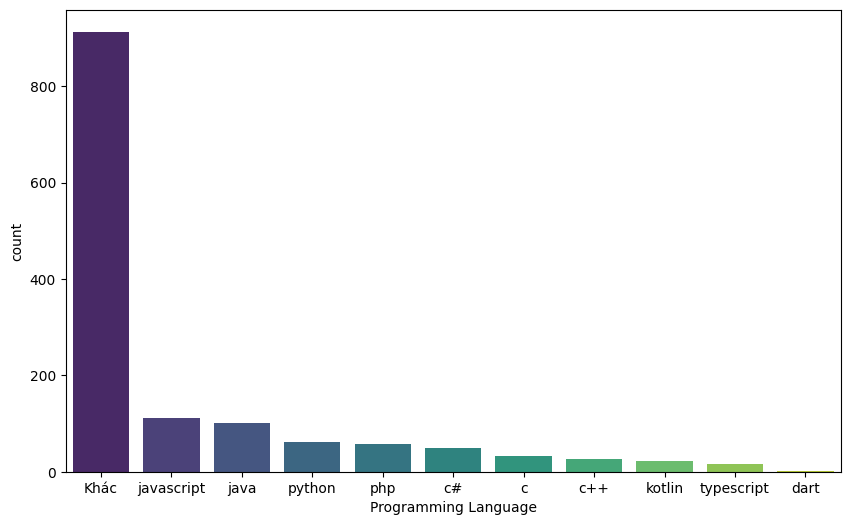

In [767]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Programming Language', data=jobs_cleaning.explode('Programming Language'), 
    order=jobs_cleaning['Programming Language'].value_counts().index, palette='viridis')

print(jobs_cleaning['Programming Language'].value_counts())

Đối với ngoại ngữ

Language
Không yêu cầu    905
tiếng anh        436
tiếng nhật        53
Name: count, dtype: int64


C:\Users\TUAN\AppData\Local\Temp\ipykernel_11880\2794450201.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Language', data=jobs_cleaning.explode('Language'),


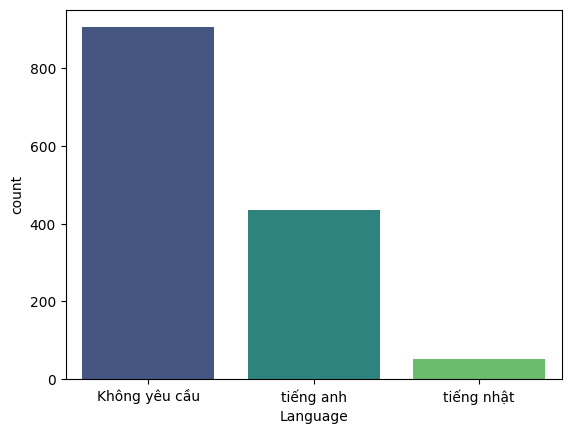

In [768]:
sns.countplot(x='Language', data=jobs_cleaning.explode('Language'), 
    order=jobs_cleaning['Language'].explode().value_counts().index, palette='viridis')

print(jobs_cleaning['Language'].value_counts())

- Detect ngôn ngữ được sử dụng để viết về bài tuyển dụng

In [769]:
def detect_language(text):
    try:
        language = detect(text)
        if language == 'en':
            return "en"
        elif language == 'vi':
            return "vi"
        else:
            return "other"
    except Exception as e:
        return "Unknown"

In [770]:
jobs_cleaning['Lang'] = jobs_cleaning['Skills'].apply(detect_language)

- Sau khi không sử dụng cột 'Skills' nữa, xóa chúng đi

In [771]:
jobs_cleaning = jobs_cleaning.drop(columns=['Skills'])

- Chuyển 'Locations' thành dữ liệu đơn

<Axes: xlabel='Locations', ylabel='count'>

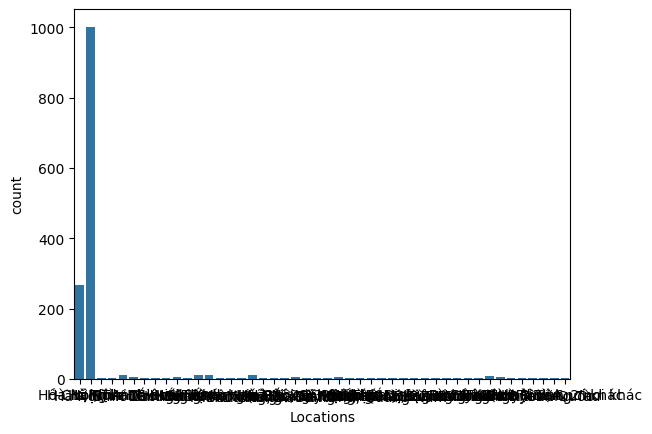

In [772]:
sns.countplot(x='Locations', data=jobs_cleaning)

'Locations' là biến kiểu dữ liệu hạng mục, một vài hạng mục xuất hiện quá ít trong dữ liệu

Chọn 3 thành phố lớn là dữ hiệu hạng mục cho biến Location, trường hợp còn lại cho thành biến 'Khác'

In [773]:
jobs_cleaning['Location'] = jobs_cleaning['Locations'].apply(lambda l: l if l in ['Hà Nội', 'Đà Nẵng', 'Hồ Chí Minh'] else 'Khác')
jobs_cleaning = jobs_cleaning.drop(columns=['Locations'])

<Axes: xlabel='Location', ylabel='count'>

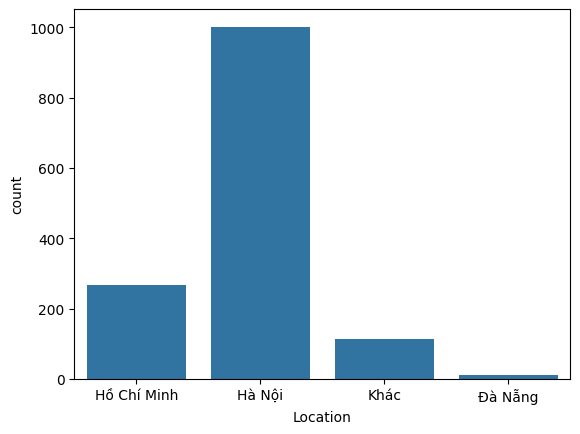

In [774]:
sns.countplot(x='Location', data=jobs_cleaning)

- Các cột còn lại sau khi làm sạch dữ liệu

In [775]:
jobs_cleaning['Level'].unique()

array(['Nhân viên', 'Trưởng/Phó phòng', 'Thực tập sinh', 'Trưởng nhóm',
       'Quản lý / Giám sát', 'Giám đốc'], dtype=object)

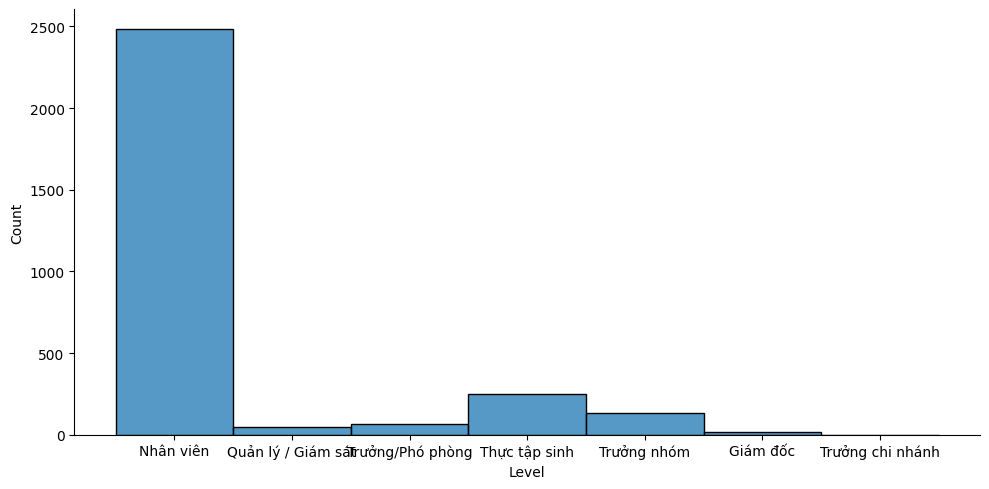

In [776]:
sns.displot(jobs, x="Level", kind="hist", height=5, aspect=2)

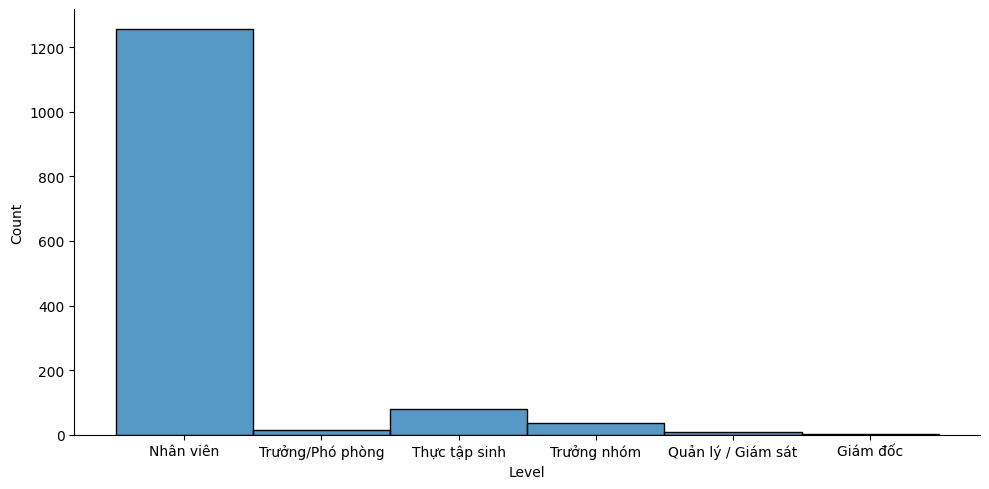

In [777]:
sns.displot(jobs_cleaning, x="Level", kind="hist", height=5, aspect=2)

<Axes: xlabel='Level'>

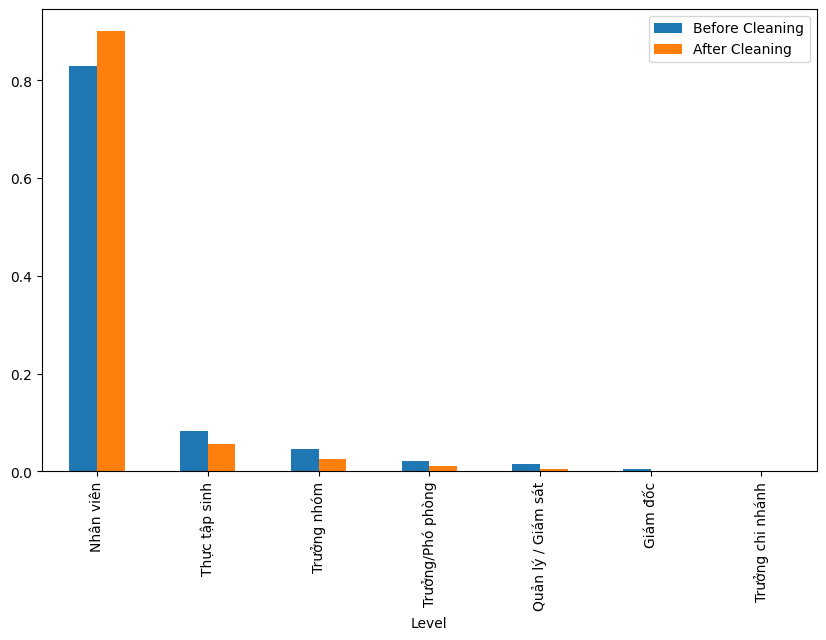

In [778]:
level = jobs['Level'].value_counts()
level_new = jobs_cleaning['Level'].value_counts()

level_ratio = level / level.sum()
level_new_ratio = level_new / level_new.sum()

df = pd.DataFrame(data=[level_ratio, level_new_ratio], index=['Before Cleaning', 'After Cleaning'])
df = df.T

df.plot(kind='bar', figsize=(10, 6))

In [779]:
jobs_cleaning['Contract Type'].unique()

array(['Toàn thời gian', 'Thực tập', 'Bán thời gian'], dtype=object)

                Contract Type  Contract Type After Cleaning
Contract Type                                              
Toàn thời gian           2893                          1370
Thực tập                   73                            12
Bán thời gian              28                            12


<Axes: xlabel='Contract Type', ylabel='Số lượng'>

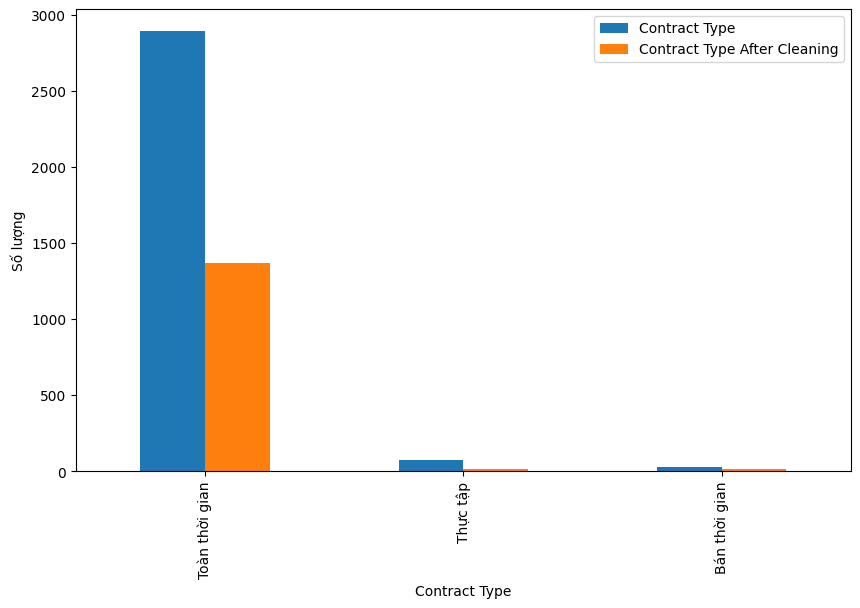

In [780]:
contract_type = jobs['Contract Type'].value_counts()
contract_type_new = jobs_cleaning['Contract Type'].value_counts()

df = pd.DataFrame(data=[contract_type, contract_type_new], index=['Contract Type', 'Contract Type After Cleaning'])
df = df.T
print(df)

df.plot(kind='bar', ylabel='Số lượng',  figsize=(10, 6))

<Axes: xlabel='Contract Type'>

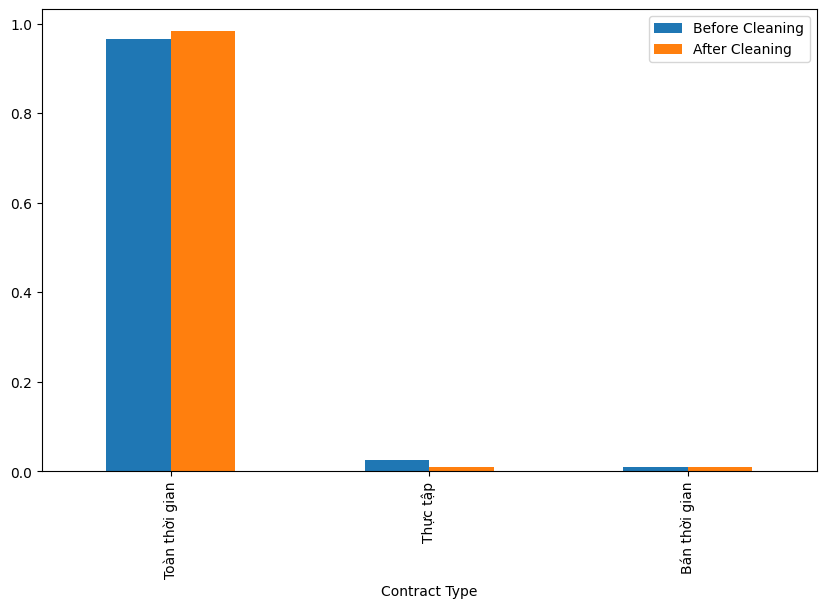

In [781]:
contract_type_ratio = contract_type / contract_type.sum()
contract_type_new_ratio = contract_type_new / contract_type_new.sum()

df = pd.DataFrame(data=[contract_type_ratio, contract_type_new_ratio], index=['Before Cleaning', 'After Cleaning'])
df = df.T

df.plot(kind='bar', figsize=(10, 6))

In [782]:
jobs_cleaning['Year of Experience'].unique()

array(['Dưới 1 năm', '1 năm', 'Không yêu cầu kinh nghiệm', '2 năm',
       '3 năm', '4 năm', '5 năm', 'Trên 5 năm'], dtype=object)

In [783]:
year_of_experience_index = np.array(['Không yêu cầu kinh nghiệm', 'Dưới 1 năm', '1 năm', '2 năm', '3 năm', '4 năm', '5 năm', 'Trên 5 năm'])

                           Year of Experience  \
Year of Experience                              
Không yêu cầu kinh nghiệm                 540   
Dưới 1 năm                                261   
1 năm                                     688   
2 năm                                     710   
3 năm                                     485   
4 năm                                     124   
5 năm                                     129   
Trên 5 năm                                 57   

                           Year of Experience After Cleaning  
Year of Experience                                            
Không yêu cầu kinh nghiệm                                250  
Dưới 1 năm                                               176  
1 năm                                                    397  
2 năm                                                    364  
3 năm                                                    177  
4 năm                                                     13  
5 năm

<Axes: xlabel='Year of Experience', ylabel='Số lượng'>

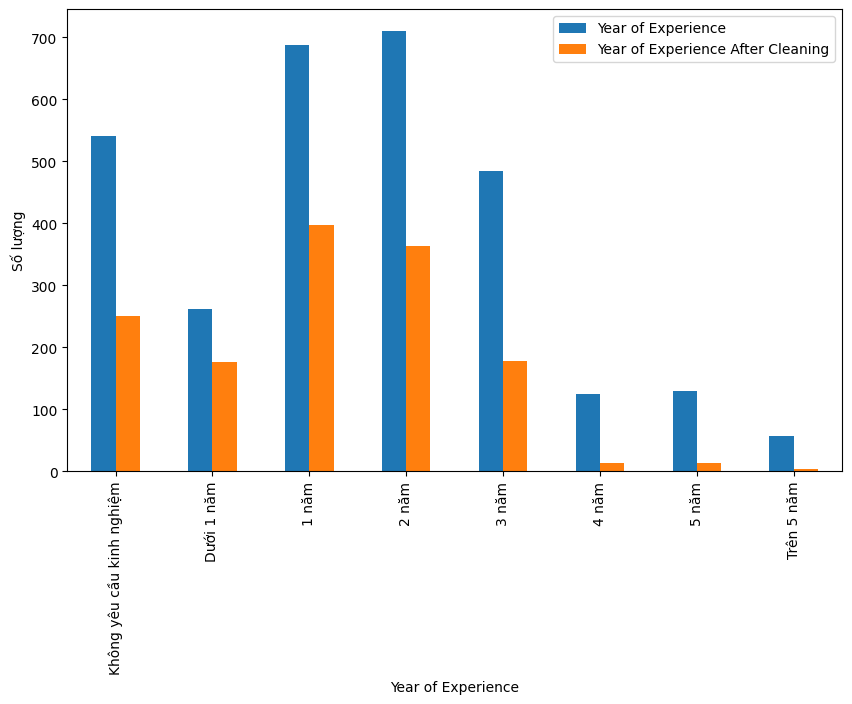

In [784]:
year_of_experience = jobs['Year of Experience'].value_counts().reindex(year_of_experience_index)
year_of_experience_new = jobs_cleaning['Year of Experience'].value_counts().reindex(year_of_experience_index)

df = pd.DataFrame(data=[year_of_experience, year_of_experience_new], index=['Year of Experience', 'Year of Experience After Cleaning'])
df = df.T
print(df)

df.plot(kind='bar', ylabel='Số lượng',  figsize=(10, 6))

<Axes: xlabel='Year of Experience', ylabel='Tỉ lệ'>

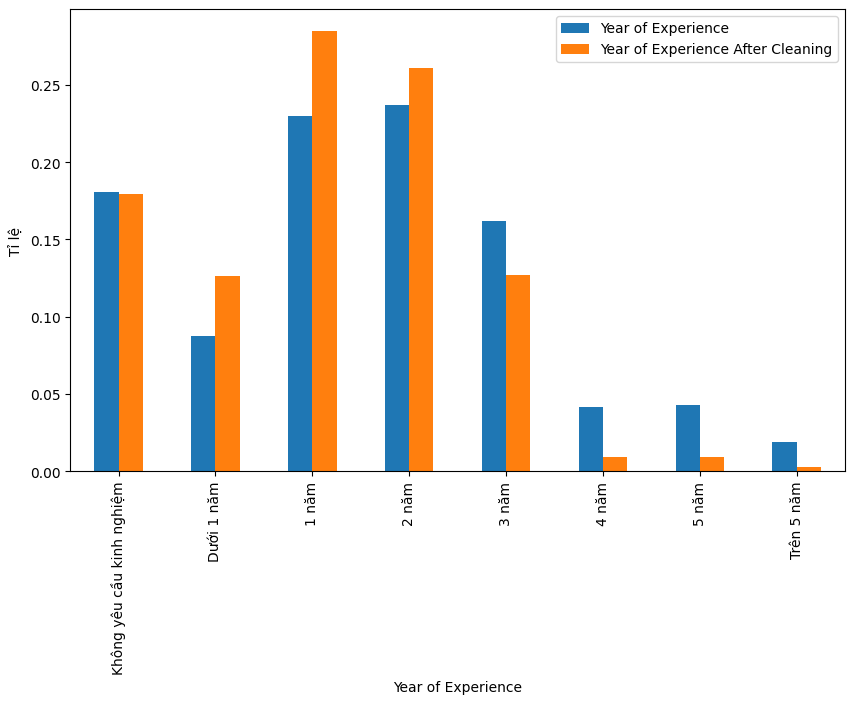

In [785]:
# Tính tỉ lệ của từng nhóm trong dữ liệu gốc
experience_ratio = year_of_experience / year_of_experience.sum()

# Tính tỉ lệ của từng nhóm trong dữ liệu sau khi làm sạch
experience_new_ratio = year_of_experience_new / year_of_experience_new.sum()

# Tạo DataFrame mới chứa tỉ lệ
df_ratio = pd.DataFrame({'Year of Experience': experience_ratio, 'Year of Experience After Cleaning': experience_new_ratio})

# Vẽ biểu đồ cột
df_ratio.plot(kind='bar', ylabel='Tỉ lệ', figsize=(10, 6))

<Axes: xlabel='Sex', ylabel='Số lượng'>

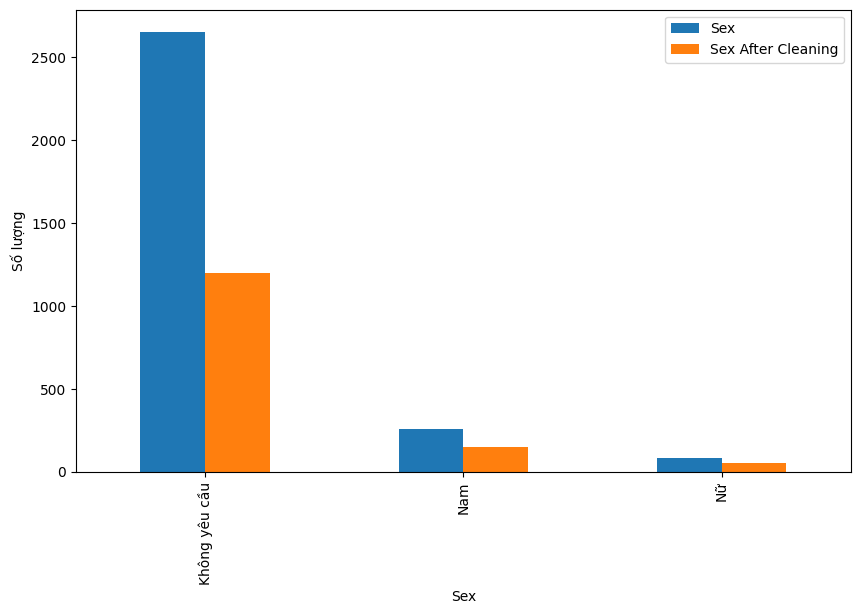

In [786]:
sex = jobs['Sex'].value_counts()
sex_new = jobs_cleaning['Sex'].value_counts()

df = pd.DataFrame(data=[sex, sex_new], index=['Sex', 'Sex After Cleaning'])
df = df.T

df.plot(kind='bar', ylabel='Số lượng',  figsize=(10, 6))

<Axes: xlabel='Sex', ylabel='Tỉ lệ'>

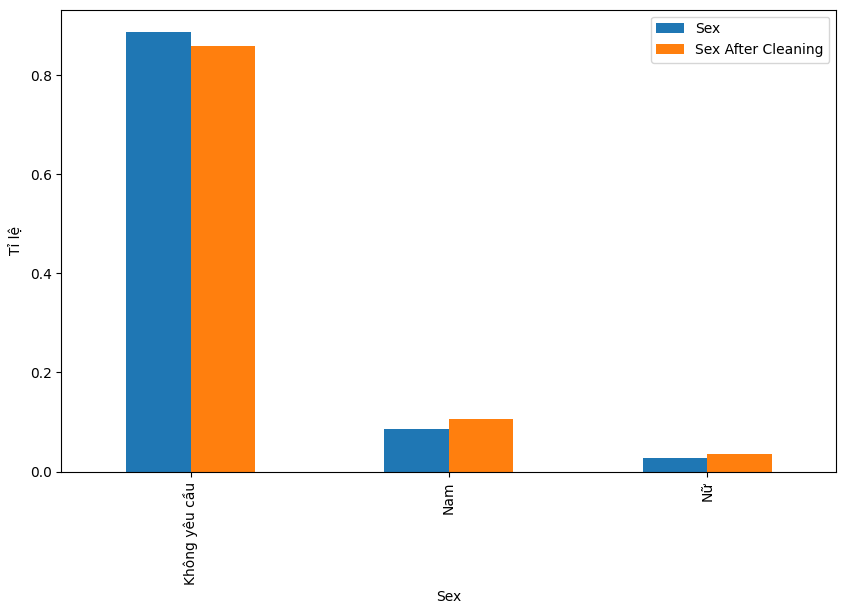

In [787]:
# Tính tỉ lệ của từng nhóm trong dữ liệu gốc
sex_ratio = sex / sex.sum()

# Tính tỉ lệ của từng nhóm trong dữ liệu sau khi làm sạch
sex_new_ratio = sex_new / sex_new.sum()

# Tạo DataFrame mới chứa tỉ lệ
df_ratio = pd.DataFrame({'Sex': sex_ratio, 'Sex After Cleaning': sex_new_ratio})

# Vẽ biểu đồ cột
df_ratio.plot(kind='bar', ylabel='Tỉ lệ', figsize=(10, 6))

Những biến mà không được làm sạch hoặc chuẩn hóa lên biến đó thì kích thước thay đổi trước và sau do có mở rộng và xóa đi những mẫu. Tuy nhiên tỉ lệ của các nhãn không thay đổi nhiều

- Sau khi làm sạch lưu vào file csv

In [788]:
jobs_cleaning = jobs_cleaning.drop(columns=['Unnamed: 0'])

In [789]:
jobs_cleaning.to_csv(clean_data_detination_path, index=False)

In [790]:
jobs_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1394 entries, 1 to 2993
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Salary                1394 non-null   float64
 1   Level                 1394 non-null   object 
 2   Year of Experience    1394 non-null   object 
 3   Contract Type         1394 non-null   object 
 4   Sex                   1394 non-null   object 
 5   Programming Language  1394 non-null   object 
 6   Language              1394 non-null   object 
 7   Lang                  1394 non-null   object 
 8   Location              1394 non-null   object 
dtypes: float64(1), object(8)
memory usage: 141.2+ KB
